В работе использовалось: 
    https://github.com/alexust98/My-pracs/blob/master/news%20sentiment/prac_2.ipynb
    https://github.com/kryzhanovskaya/mmp_practicum_fall_2018/blob/master/Линейные%20модели%20классификации/report.pdf
    https://github.com/mmp-practicum-team/mmp_practicum_fall_2018/blob/master/08_linear_and_text/main.pdf

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('toxic_train.csv')
test = pd.read_csv('toxic_test.csv')
train.head(15)

,Unnamed: 0,comment_text,is_toxic
0,0,Explanation\nWhy the edits made under my usern...,False
1,1,D'aww! He matches this background colour I'm s...,False
2,2,"Hey man, I'm really not trying to edit war. It...",False
3,3,"""\nMore\nI can't make any real suggestions on ...",False
4,4,"You, sir, are my hero. Any chance you remember...",False
5,5,"""\n\nCongratulations from me as well, use the ...",False
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,True
7,7,Your vandalism to the Matt Shirvington article...,False
8,8,Sorry if the word 'nonsense' was offensive to ...,False
9,9,alignment on this subject and which are contra...,False


### 1 Произведите предварительную обработку текста. Приведите все тексты к нижнему регистру. Замените в тексте все символы, не являющиеся буквами и цифрами, на пробелы.
#### Замечание. Полезные функции: str.lower, str.split, str.isalnum, re.sub, re.split.
False заменено на -1, а True на 1 для удобства

In [2]:
import re
def function(string):
    string = string.lower()
    string = re.sub('[^a-z, 0-9]', ' ', string)
    string = re.sub('  ', ' ', string)
    string = re.sub(',', '', string)
    return string

train['comment_text'] = train['comment_text'].apply(function)
train['is_toxic'] = train['is_toxic'].apply(lambda x: -1 if x == False  else 1)
test['comment_text'] = train['comment_text'].apply(function)
test['is_toxic'] = train['is_toxic'].apply(lambda x: -1 if x == False  else 1)
train.head(15)

,Unnamed: 0,comment_text,is_toxic
0,0,explanation why the edits made under my userna...,-1
1,1,d aww he matches this background colour i m se...,-1
2,2,hey man i m really not trying to edit war it s...,-1
3,3,more i can t make any real suggestions on imp...,-1
4,4,you sir are my hero any chance you remember wh...,-1
5,5,congratulations from me as well use the tool...,-1
6,6,cocksucker before you piss around on my work,1
7,7,your vandalism to the matt shirvington article...,-1
8,8,sorry if the word nonsense was offensive to yo...,-1
9,9,alignment on this subject and which are contra...,-1


In [3]:
train['comment_text'].head(15)

0     explanation why the edits made under my userna...
1     d aww he matches this background colour i m se...
2     hey man i m really not trying to edit war it s...
3      more i can t make any real suggestions on imp...
4     you sir are my hero any chance you remember wh...
5       congratulations from me as well use the tool...
6          cocksucker before you piss around on my work
7     your vandalism to the matt shirvington article...
8     sorry if the word nonsense was offensive to yo...
9     alignment on this subject and which are contra...
10     fair use rationale for image wonju jpg thanks...
11    bbq  be a man and lets discuss it maybe over t...
12    hey  what is it    talk  what is it  an exclus...
13    before you start throwing accusations and warn...
14    oh and the girl above started her arguments wi...
Name: comment_text, dtype: object

### 2 Преобразуйте выборку в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j) означает, что в документе i слово j встретилось x раз. Разрешается воспользоваться конструктором sklearn.feature_extraction.text.CountVectorizer.
 #### Замечание 1. У CountVectorizer есть несколько методов для работы, используйте fit_transform и fit для обучающей выборки, используйте transform для тестовой.
 ##### Замечание 2. Используйте параметр min_df, чтобы уменьшить размерность данных и ускорить проведение экспериментов.

Без min_df

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
#for train fit_transform and fit, for test transform
vectorizer = CountVectorizer(min_df=0.1)
X_train = vectorizer.fit_transform(train['comment_text'])
X_test = vectorizer.transform(test['comment_text'])

In [5]:
X_train.shape

(52061, 18250)

In [6]:
X_test.shape

(20676, 18250)

In [7]:
Y_train = train['is_toxic']
Y_test = test['is_toxic']

In [8]:
import random
import numpy as np
import scipy
import oracles
import optimization

In [9]:
model = optimization.GDClassifier('binary_logistic', step_alpha =0.01, step_beta = 0, max_iter=100, l2_coef=1, trace=True)

In [10]:
model.fit(X_train, Y_train)

In [11]:
Y_pred = model.predict(X_test)

Проверка на адекватность

In [12]:
model.score(X_train, Y_train)

0.7747065941875876

## 3. Исследуйте поведение градиентного спуска для задачи логистической регрессии в зависимости от следующих параметров:

• параметр размера шага step_alpha

• параметр размера шага step_beta

• начального приближения

Исследование поведения подразумевает анализ следуюших зависимостей:

• зависимость значения функции потерь от реального времени работы метода

• зависимость значения функции потерь от итерации метода (эпохи в случае стохастического варианта)

• зависимость точности (accuracy) от реального времени работы метода

• зависимость точности (accuracy) итерации метода (эпохи в случае стохастического варианта)

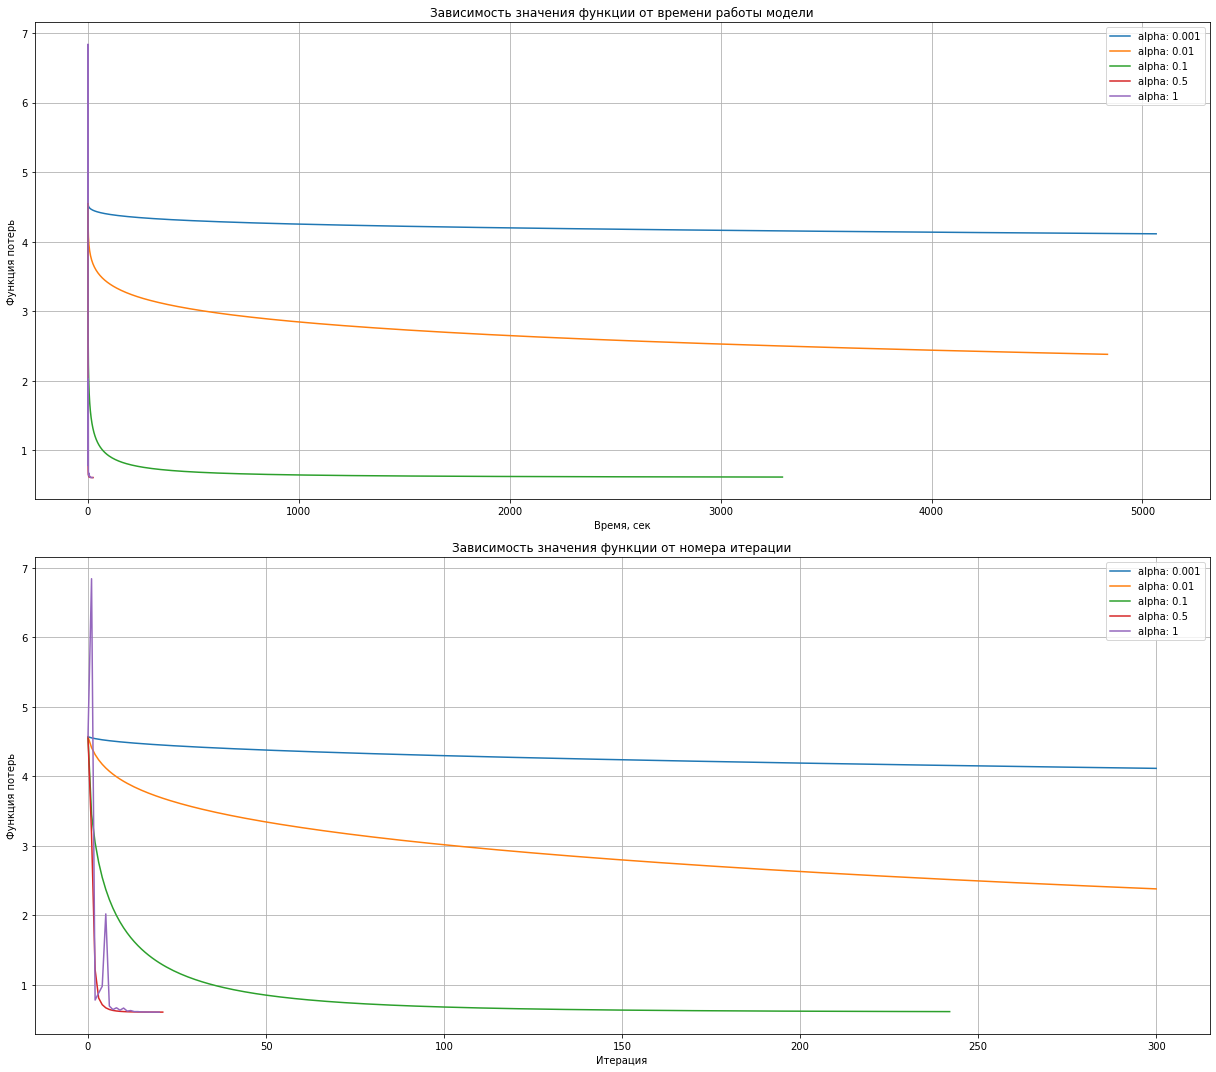

In [39]:
from optimization import GDClassifier
import random
import matplotlib.pyplot as plt


start = random.random()*5
w = np.array([start]*X_train[1])
alpha_vals = [0.001, 0.01, 0.1, 0.5, 1]
fig, axs = plt.subplots(2, figsize = (17, 15))
for alpha in alpha_vals:
    obj = GDClassifier('binary_logistic', step_alpha = alpha, step_beta = 0.5, max_iter=2000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='alpha: '+str(alpha)[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время, сек")
    axs[0].grid()
    axs[0].legend()
    
    axs[1].plot(np.arange(0, len(result['func'])), result['func'], label='alpha: '+str(alpha)[:6])
    axs[1].set_title(u"Зависимость значения функции от номера итерации")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Итерация")
    axs[1].grid()
    axs[1].legend()
    
fig.tight_layout()

Заметим, что при очень маленьких \alpha шаг маленький и поэтому функция потерь убывает медленно, успевая достичь минимума при заданном тореранс.
Видно, что при альфа=1 метод в какой-то момент перешагнул через минимум (скачок на графике). Т.е можно сделать вывод, что оптимальный альфа лежит между 0.5 и 1.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


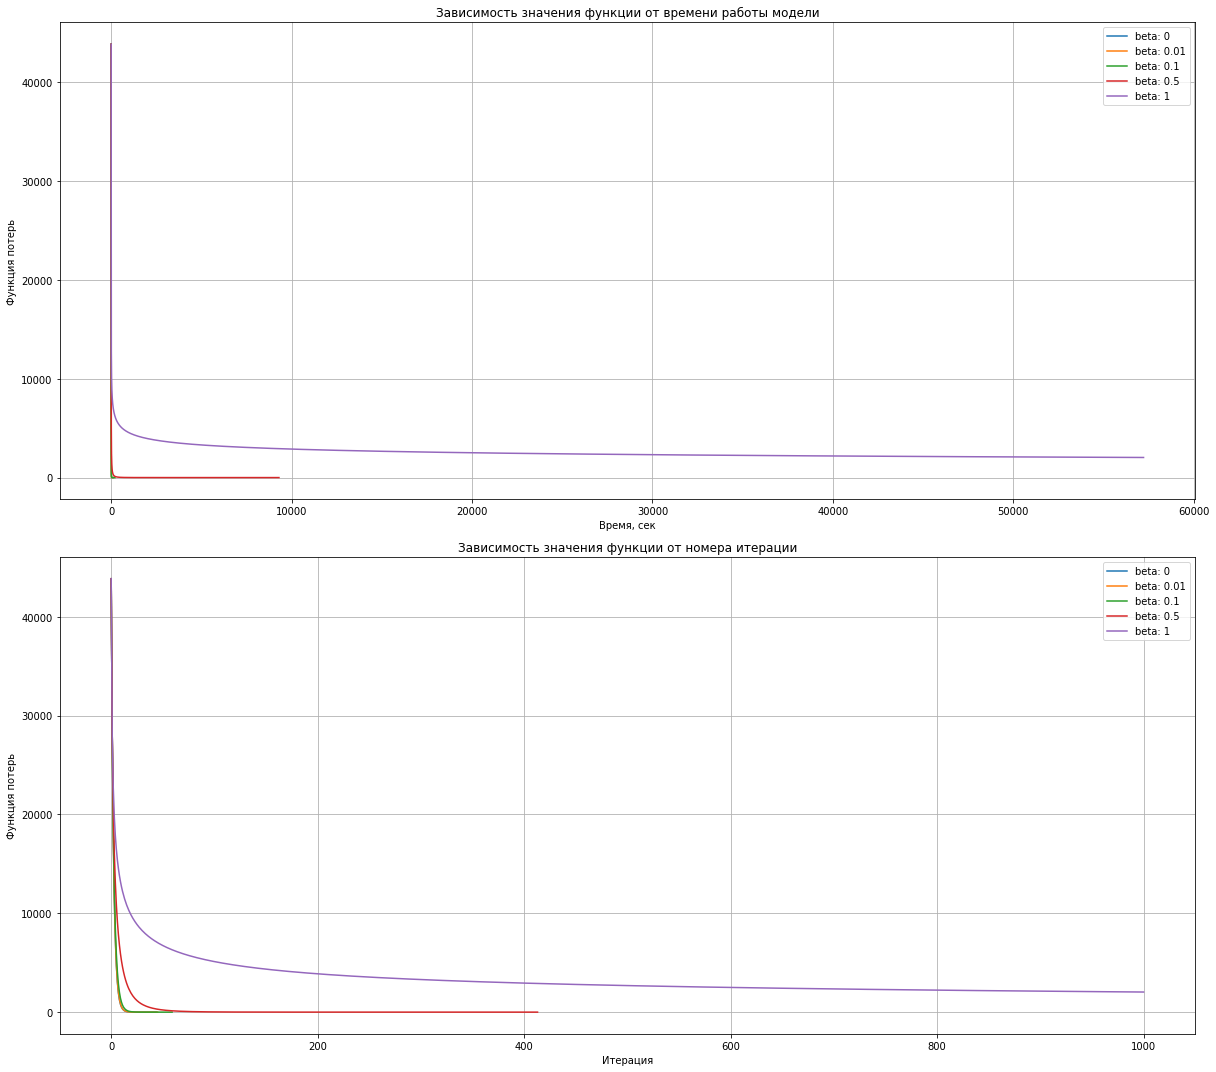

In [40]:
start = random.random()*5
w = np.array([start]*X_train.shape[1])
beta_vals = [0, 0.01, 0.1, 0.5, 1]
fig, axs = plt.subplots(2, figsize = (17, 15))
for beta in beta_vals:
    obj = GDClassifier('binary_logistic', step_alpha = 0.2, step_beta = beta, max_iter=2000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='beta: '+str(beta)[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время, сек")
    axs[0].grid()
    #axs[0][0].set_xscale('log')
    axs[0].legend()
    
    axs[1].plot(np.arange(0, len(result['func'])), result['func'], label='beta: '+str(beta)[:6])
    axs[1].set_title(u"Зависимость значения функции от номера итерации")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Итерация")
    axs[1].grid()
    #axs[0][1].set_xscale('log')
    axs[1].legend()

fig.tight_layout()
fig.savefig('gd_binary_beta.eps', format='eps')

$\betta$ отвечает за длину шага, начальные шаги будут большие, и чем больше значение итерации, тем меньше будет шаг, т.к по мере приближения к минимуму с количеством шагом ожидается, что нужно будет уточнять более точно. Ожидается, что при $\betta$ = 0 метод должен расходится из-за способа задания шага (деление на $\betta$)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


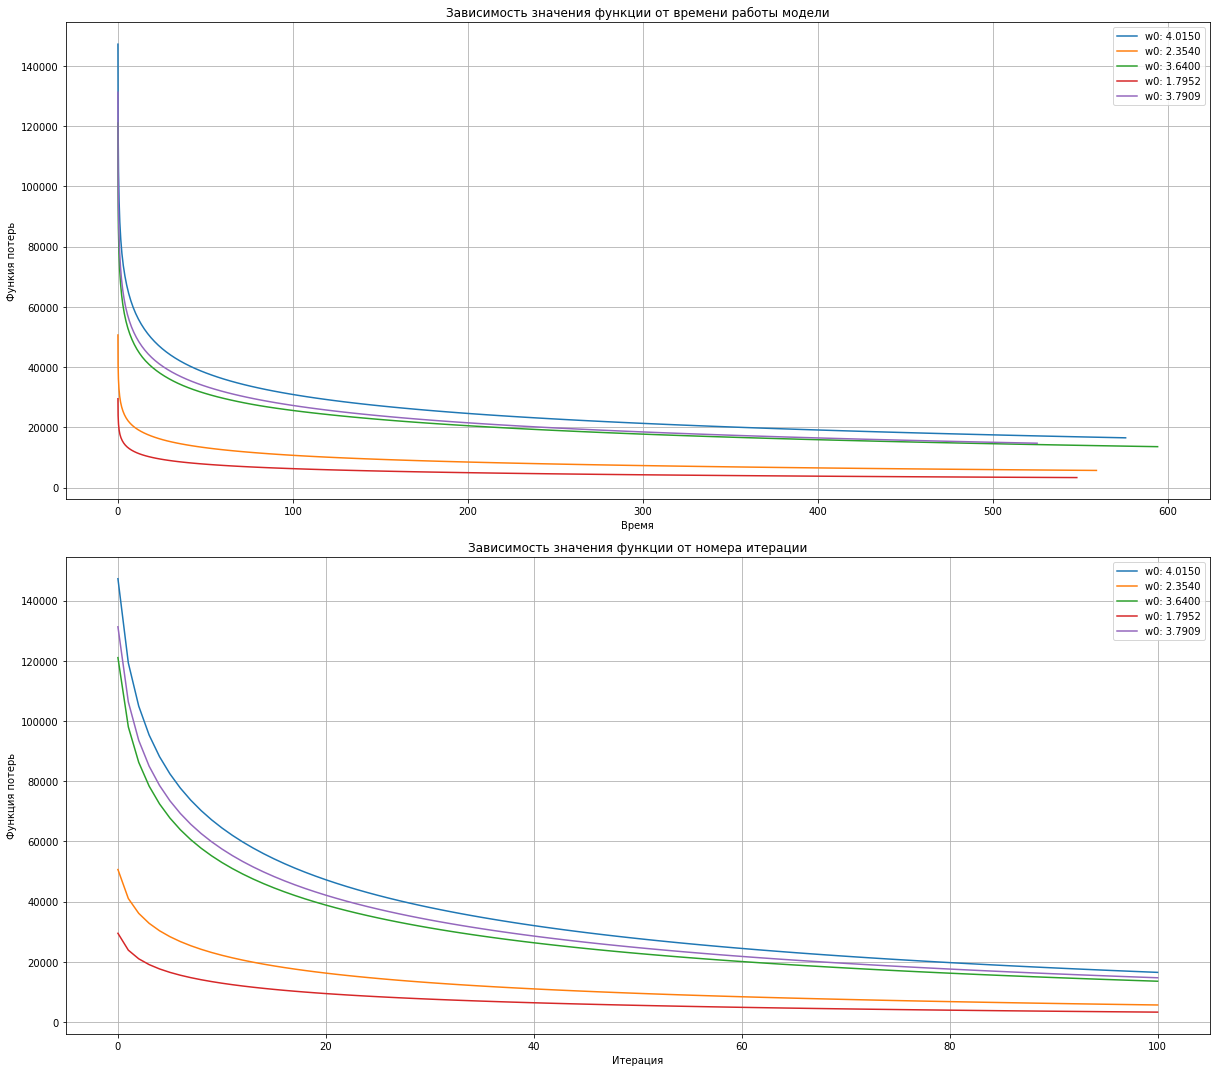

In [23]:
w_vals = []
for i in range(5):
    start = random.random()*5
    w_vals.append(np.array([start]*X_train.shape[1]))

fig, axs = plt.subplots(2, figsize = (17, 15))
for w in w_vals:
    obj = GDClassifier('binary_logistic', step_alpha = 0.1, step_beta = 0.7, max_iter=2000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='w0: '+str(w[0])[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функия потерь")
    axs[0].set_xlabel("Время")
    axs[0].grid()
    #axs[0][0].set_xscale('log')
    axs[0].legend()
    
    axs[1].plot(np.arange(0, len(result['func'])), result['func'], label='w0: '+str(w[0])[:6])
    axs[1].set_title(u"Зависимость значения функции от номера итерации")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Итерация")
    axs[1].grid()
    #axs[0][1].set_xscale('log')
    axs[1].legend()

fig.tight_layout()
fig.savefig('gd_binary_weights.eps', format='eps')

При любом начальном векторе весов метод сходится, и чем он больше, тем более явно при начальных итерациях сходится метод.

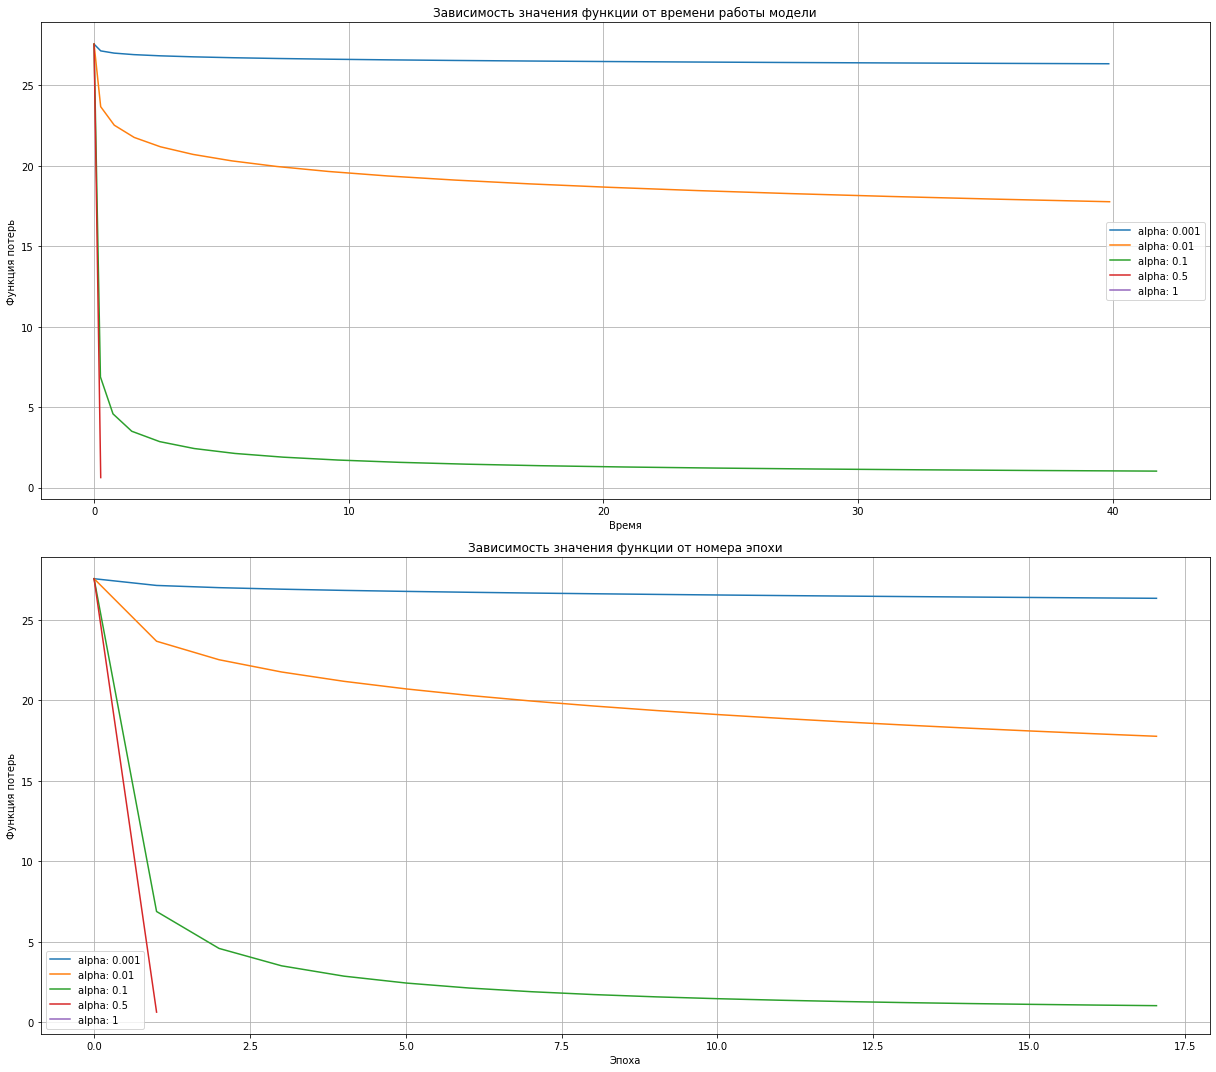

In [20]:
from optimization import SGDClassifier
import matplotlib.pyplot as plt
import random
alpha_vals = [0.001, 0.01, 0.1, 0.5, 1]
start = random.random()*5
w = np.array([start]*X_train[1])
fig, axs = plt.subplots(2, figsize = (17, 15))
for alpha in alpha_vals:
    obj = SGDClassifier('binary_logistic', batch_size = 1800, step_alpha = alpha, step_beta = 0.69, max_iter=500, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, log_freq = 1, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='alpha: '+str(alpha)[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время")
    axs[0].grid()
    axs[0].legend()
    
    axs[1].plot(result['epoch_num'], result['func'], label='alpha: '+str(alpha)[:6])
    axs[1].set_title(u"Зависимость значения функции от номера эпохи")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Эпоха")
    axs[1].grid()
    axs[1].legend()
fig.tight_layout()

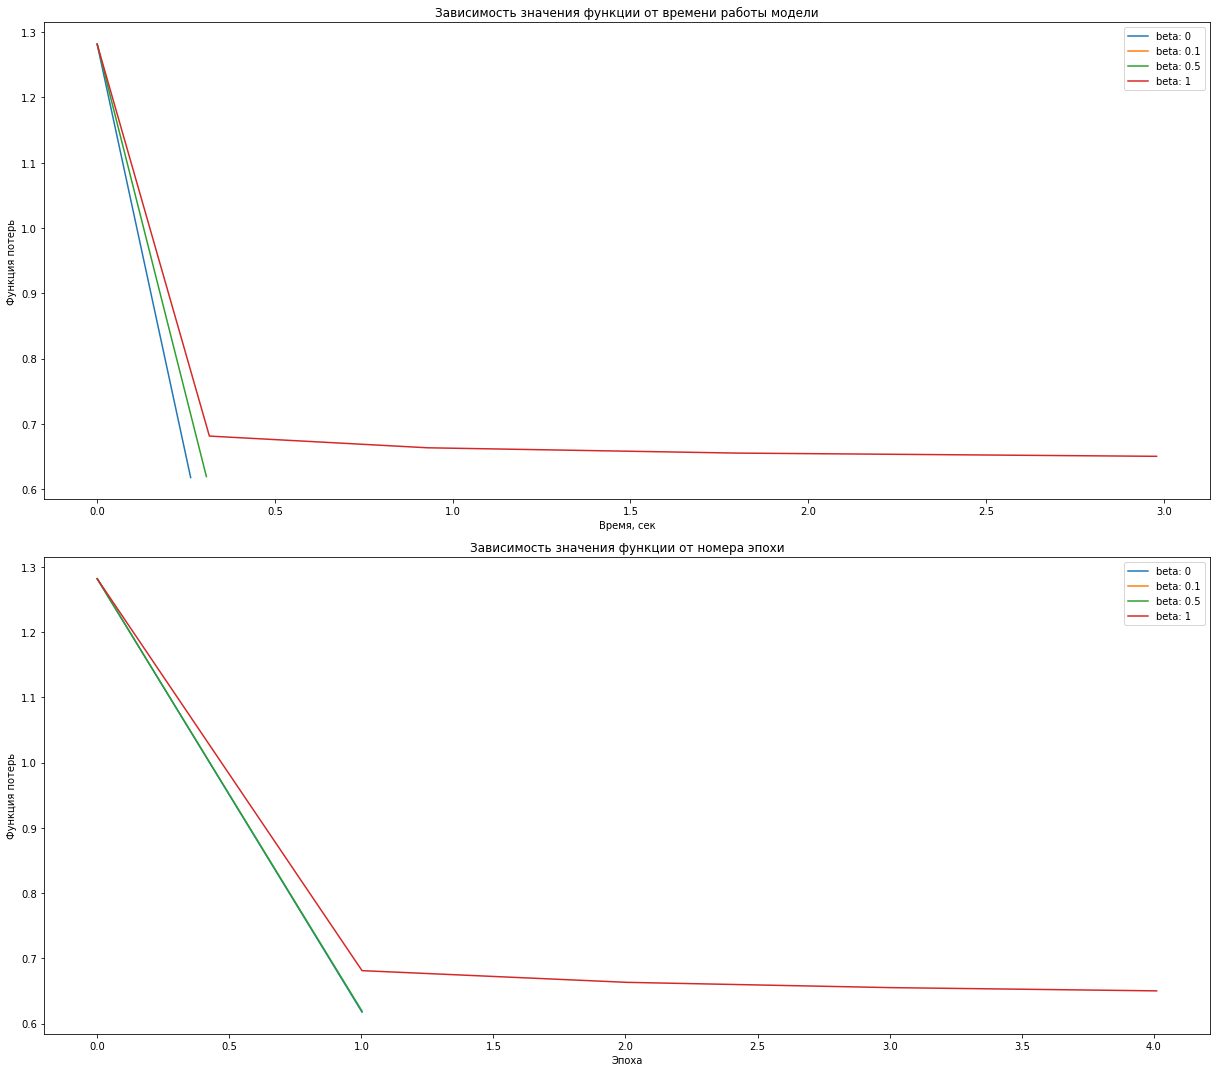

In [21]:
beta_vals = [0, 0.1, 0.5, 1]
fig, axs = plt.subplots(2, figsize = (17, 15))
start = random.random()*5
w = np.array([start]*X_train[1])
for beta in beta_vals:
    obj = SGDClassifier('binary_logistic', batch_size = 1800, step_alpha = 0.2, step_beta = beta, max_iter=1000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, log_freq = 1, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='beta: '+str(beta)[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время, сек")
    axs[0].grid()
    axs[0].legend()
    
    axs[1].plot(result['epoch_num'], result['func'], label='beta: '+str(beta)[:6])
    axs[1].set_title(u"Зависимость значения функции от номера эпохи")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Эпоха")
    axs[1].grid()
    axs[1].legend()

fig.tight_layout()

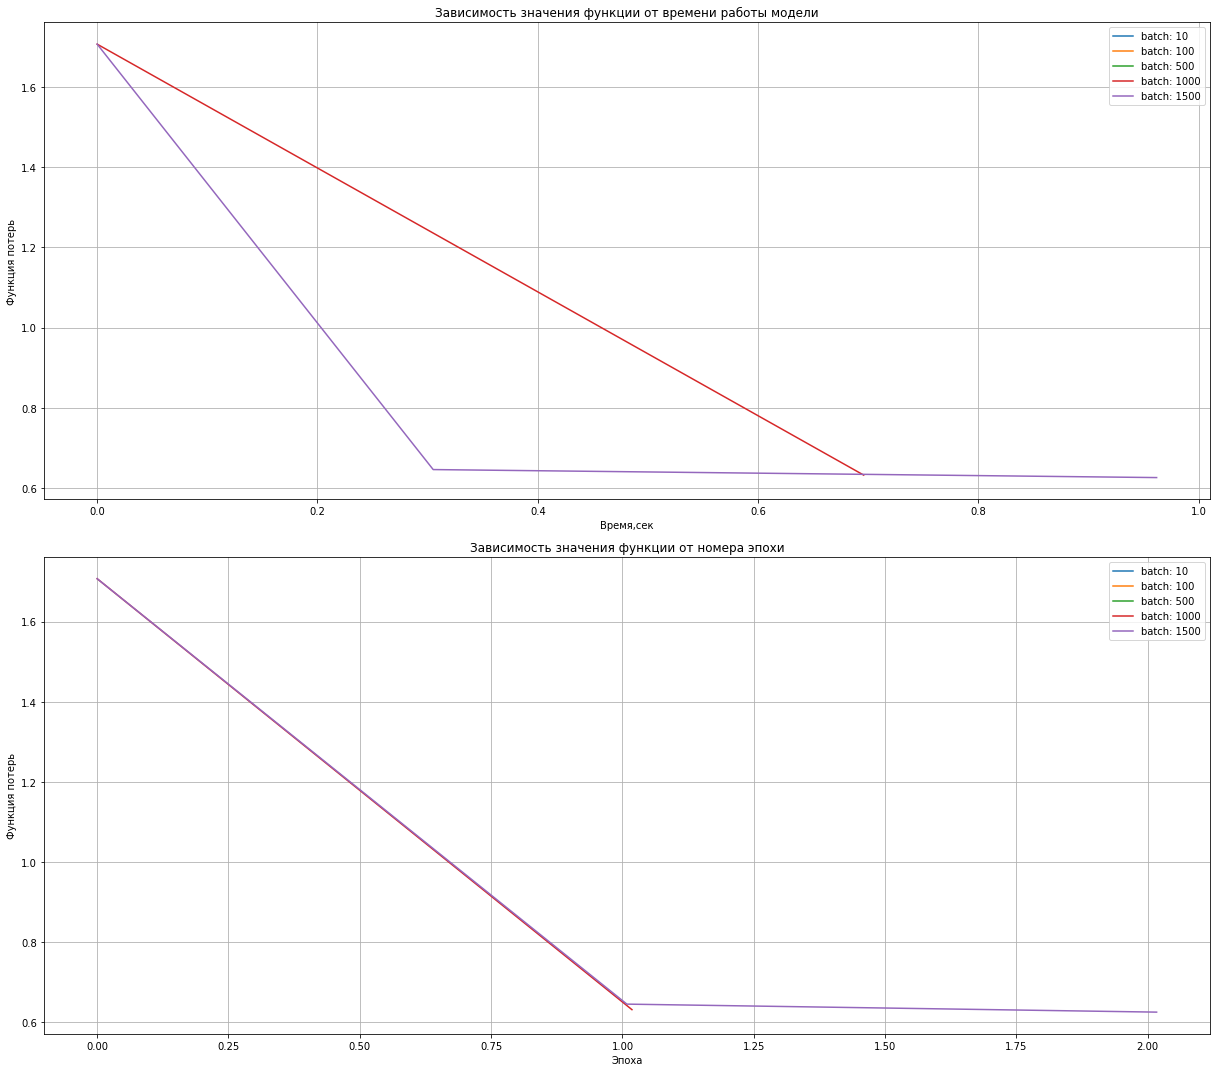

In [22]:
import numpy as np

batch_vals = [10, 100, 500, 1000, 1500]
fig, axs = plt.subplots(2, figsize = (17, 15))
start = random.random()*5
w = np.array([start]*X_train[1])
for batch in batch_vals:
    obj = SGDClassifier('binary_logistic', batch_size = batch, step_alpha = 0.2, step_beta = 0.7, max_iter=1000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, log_freq = 1, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='batch: '+str(batch)[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время,сек")
    axs[0].grid()
    axs[0].legend()
    
    axs[1].plot(result['epoch_num'], result['func'], label='batch: '+str(batch)[:6])
    axs[1].set_title(u"Зависимость значения функции от номера эпохи")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Эпоха")
    axs[1].grid()
    axs[1].legend()

fig.tight_layout()

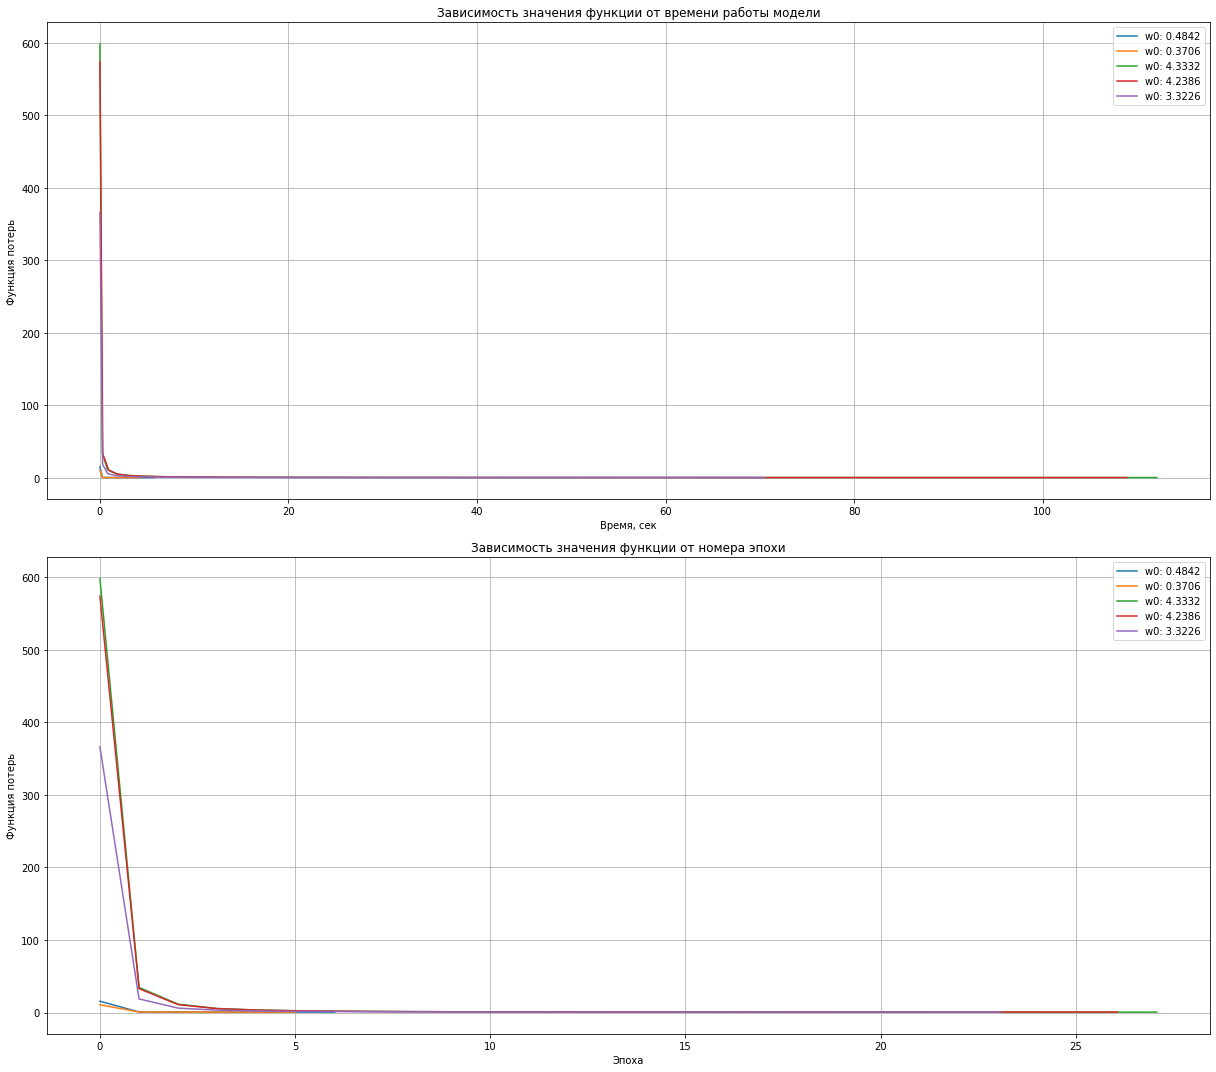

In [24]:
import random
w_vals = []
for i in range(5):
    start = random.random()*5
    w_vals.append(np.array([start]*X_train.shape[1]))
fig, axs = plt.subplots(2, figsize = (17, 15))
w = np.array([start]*X_train[1])
for w in w_vals:
    obj = SGDClassifier('binary_logistic', batch_size = 1800, step_alpha = 0.2, step_beta = 0.7, max_iter=2000, tolerance = 1e-4, l2_coef=1)
    result = obj.fit(X_train, Y_train, trace=True, log_freq = 1, w_0=w)
    
    axs[0].plot(np.cumsum(result['time']), result['func'], label='w0: '+str(w[0])[:6])
    axs[0].set_title(u"Зависимость значения функции от времени работы модели")
    axs[0].set_ylabel("Функция потерь")
    axs[0].set_xlabel("Время, сек")
    axs[0].grid()
    axs[0].legend()
    
    axs[1].plot(result['epoch_num'], result['func'], label='w0: '+str(w[0])[:6])
    axs[1].set_title(u"Зависимость значения функции от номера эпохи")
    axs[1].set_ylabel("Функция потерь")
    axs[1].set_xlabel("Эпоха")
    axs[1].grid()
    axs[1].legend()

fig.tight_layout()

## 6. Исследуйте качество, время работы алгоритма и размер признакового пространства в зависимости от следуюших факторов:
• использовалось представление BagOfWords или Tfidf
• параметров min_df и max_df конструкторов.


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
import matplotlib.pyplot as plt 
from optimization import GDClassifier
from time import time
min_df_vals = [0.5, 0.1, 0.05, 0.01]
score_vals = []
time_vals = []
size_vals = []

for min_df in min_df_vals:
    obj = CountVectorizer(min_df = min_df)
    X_train = obj.fit_transform(train['comment_text'])
    X_test = obj.transform(test['comment_text'])
    time_start = time()
    obj = GDClassifier('binary_logistic', step_alpha = 0.1, step_beta = 0.57, max_iter=1000, l2_coef=1)
    obj.fit(X_train, Y_train-1)
    score_vals.append(obj.score(X_test, Y_test-1))
    time_vals.append(time()-time_start)
    size_vals.append(X_train.shape[1])
    print('Ready')

Ready
Ready
Ready
Ready


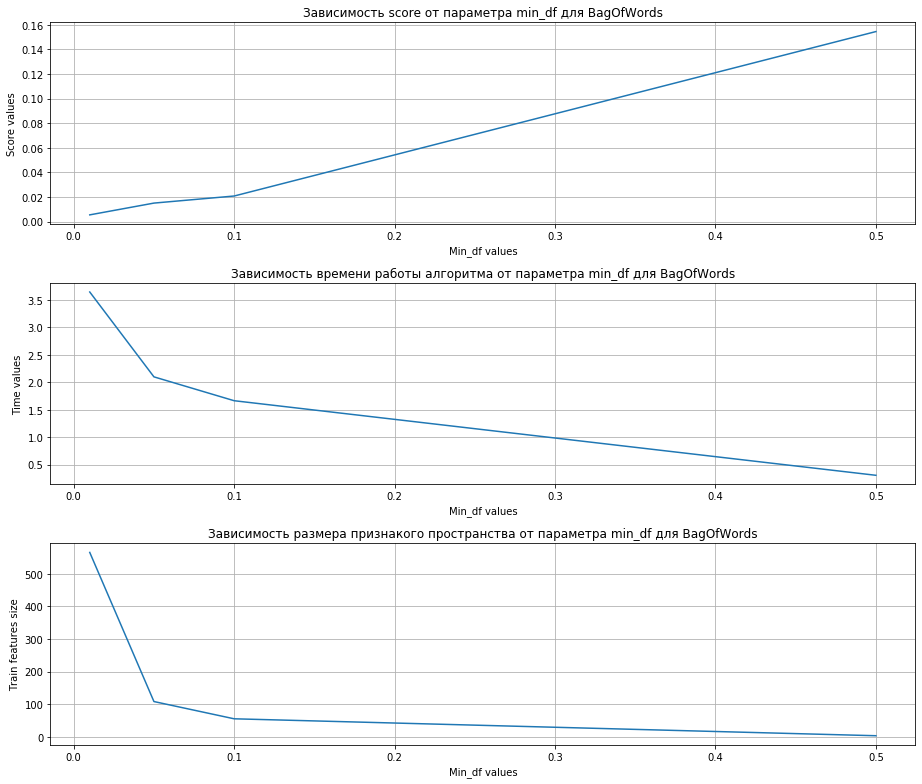

In [30]:
fig, axs = plt.subplots(3, 1, figsize = (13, 11))
axs[0].plot(min_df_vals, score_vals)
axs[0].set_title(u"Зависимость score от параметра min_df для BagOfWords")
axs[0].set_ylabel("Score values")
axs[0].set_xlabel("Min_df values")
axs[0].grid()
#axs[0][0].set_xscale('log')

axs[1].plot(min_df_vals, time_vals)
axs[1].set_title(u"Зависимость времени работы алгоритма от параметра min_df для BagOfWords")
axs[1].set_ylabel("Time values")
axs[1].set_xlabel("Min_df values")
axs[1].grid()
#axs[0][0].set_xscale('log')

axs[2].plot(min_df_vals, size_vals)
axs[2].set_title(u"Зависимость размера признакого пространства от параметра min_df для BagOfWords")
axs[2].set_ylabel("Train features size")
axs[2].set_xlabel("Min_df values")
axs[2].grid()
#axs[0][0].set_xscale('log')
fig.tight_layout()
fig.savefig('gd_BOW_min.eps', format='eps')